# Setup

In [52]:
import pandas as pd
import os

# for ARIMA:
import warnings
import itertools
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Load the data

In [11]:
df = pd.read_csv(os.getcwd()+"/data/day.csv")
df["dteday"] = pd.to_datetime(df["dteday"])
df = df.sort_values(by="dteday",ascending=True)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Train-Test-Split

In [13]:
y = df["cnt"]

# don't split random but take the first 18 month as train data and the last 6 month as test data
test_idx = df[(df["yr"]==1) & (df["mnth"]>5)].index

y_test=y.iloc[test_idx,]
y_train=y.drop(test_idx)

# ARIMA
https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3#step-6-%E2%80%94-validating-forecasts

## Parameter Selection for the ARIMA Time Series Model

In [15]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [18]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:10064.286316043152
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:9392.013938634558
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:8598.452890213379
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:8305.771452859779
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:8614.92943133116
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:8499.118888897981
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:8333.23545793413
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:8305.31555189471
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:9719.027580631455
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:9037.466748059709
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:8511.867843505494
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:8195.258721118304
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:8539.119008768263
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:8386.201088321024
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:8250.710587275134
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:8196.599621080059
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:8566.96847105898
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:8379.369692940427
ARIMA(0, 1, 0

In [20]:
np.min(results.aic)

8029.861089943999

## Fitting an ARIMA Time Series Model

In [21]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3504      0.039      9.014      0.000       0.274       0.427
ma.L1         -1.1298      0.029    -38.618      0.000      -1.187      -1.072
ar.S.L12      -0.0345      0.041     -0.840      0.401      -0.115       0.046
ma.S.L12      -1.0010      0.055    -18.160      0.000      -1.109      -0.893
sigma2      6.792e+05   8.01e-08   8.48e+12      0.000    6.79e+05    6.79e+05


# !!! `ar.S.L12` has a high p-value !!! 

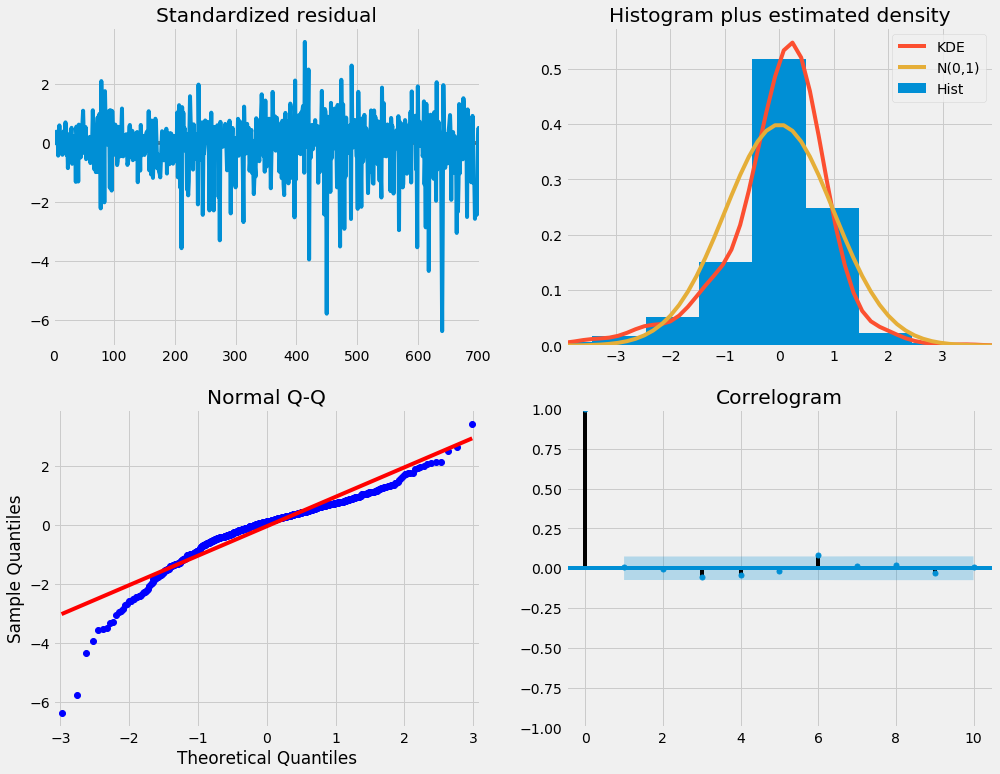

In [22]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

## Validating Forecasts

In [25]:
np.min(df.loc[test_idx,"dteday"])

Timestamp('2012-06-01 00:00:00')

In [45]:
start_idx=min(test_idx)
print(start_idx)

517


In [32]:
pred = results.get_prediction(start=start_idx, dynamic=False)
pred_ci = pred.conf_int()

In [47]:
# zoom the plot in to yr==1 (2012)
y_yr1 = df[df["yr"]==1].cnt

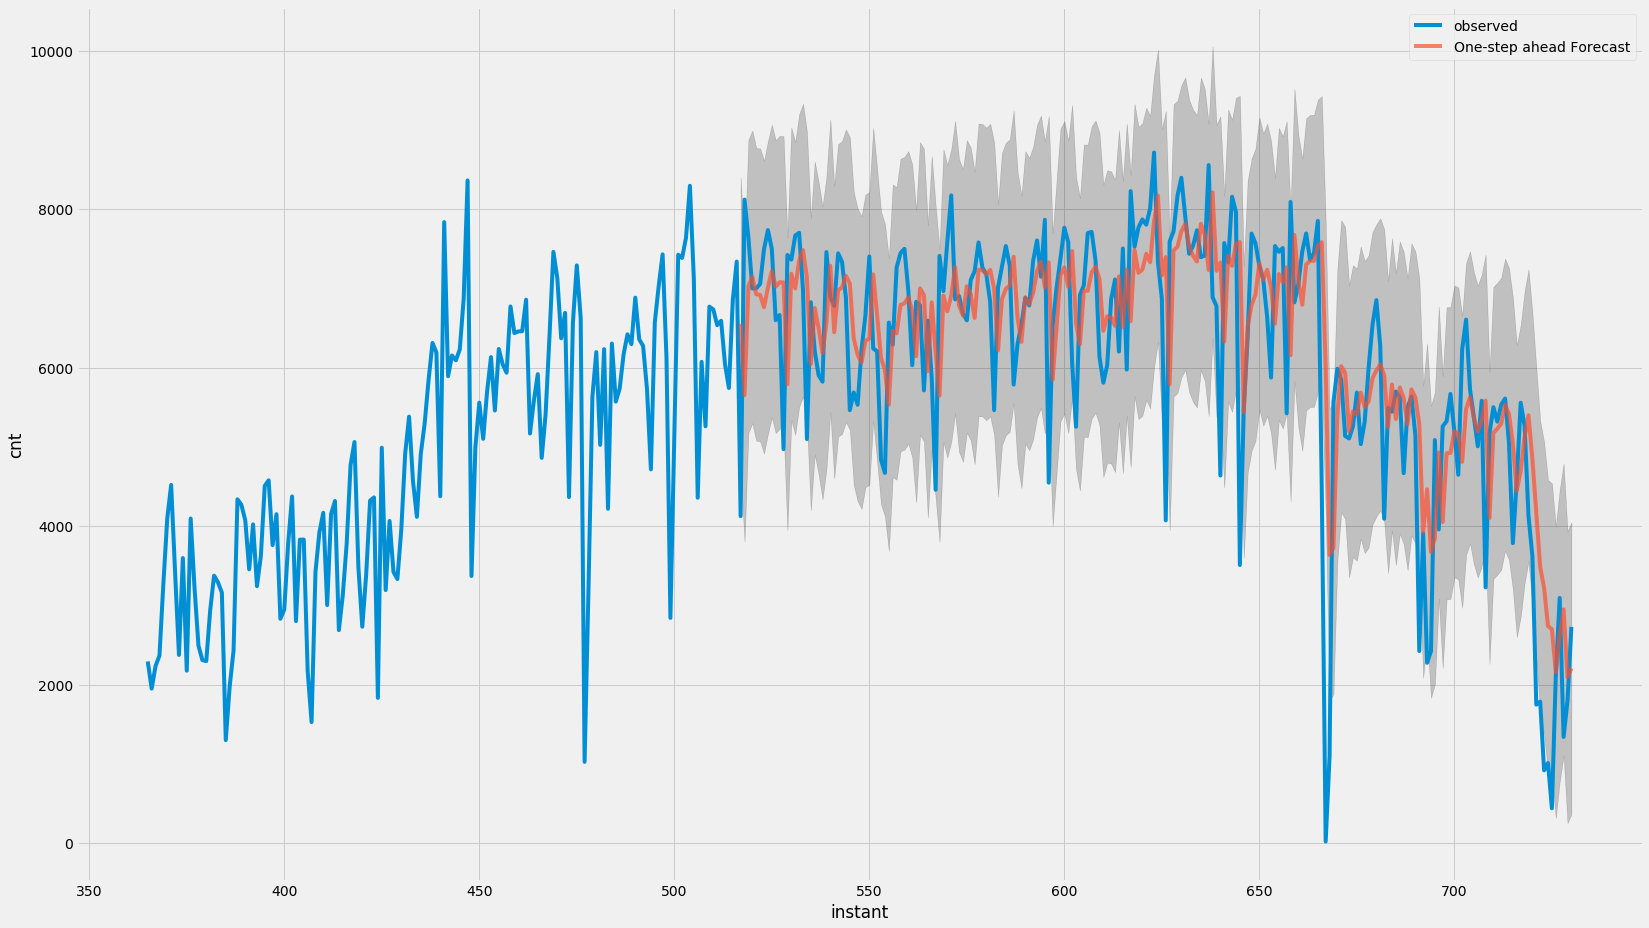

In [50]:
f, ax = plt.subplots(figsize=(25,15)) # Create a figure and one subplot

ax = y_yr1.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('instant')
ax.set_ylabel('cnt')
plt.legend()

plt.show()

In [42]:
y_forecasted = pred.predicted_mean
y_truth = y_test

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {:,}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1,254,599.52
